# Stochastic Gradient Descent


In [47]:
#import paskages
import pandas as pd
from IPython.display import display
from tensorflow import keras
from keras import layers

In [48]:
#load data
red_wine = pd.read_csv("data/red-wine.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7 , random_state=0)
df_valid=red_wine.drop(df_train.index)
#display(df_train.head)

In [50]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [51]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_)/ (max_-min_)
df_valid = (df_valid - min_)/ (max_-min_)

In [52]:
# Split features and target
X_train=df_train.drop("quality" , axis=1)
X_Valid = df_valid.drop("quality",axis=1)

y_train= df_train['quality']
y_valid=df_valid['quality']

In [53]:
# shape data 
print(X_train.shape)

(1119, 11)


###### chosen a three-layer network with over 1500 neurons.

In [54]:
model = keras.Sequential([
    layers.Dense(512 , activation="relu"),
    layers.Dense(512 , activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),   
])

##### we compile in the optimizer and loss function.

In [55]:
model.compile(optimizer="adam",
             loss="mae")

We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).

In [58]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_Valid, y_valid),
    batch_size=256,
    epochs=1000,
)

Epoch 1/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.0997 - val_loss: 0.0996
Epoch 2/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.1006 - val_loss: 0.1094
Epoch 3/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0997 - val_loss: 0.0987
Epoch 4/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0990 - val_loss: 0.0990
Epoch 5/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0994 - val_loss: 0.1046
Epoch 6/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0974 - val_loss: 0.1005
Epoch 7/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0954 - val_loss: 0.0968
Epoch 8/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0952 - val_loss: 0.0977
Epoch 9/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0931 - val_loss: 0.1015
Epoch 10/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0934 - val_loss: 0.0973
Epoch 11/

5/5 [==============================] - 0s 22ms/step - loss: 0.0661 - val_loss: 0.0948
Epoch 84/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0679 - val_loss: 0.0931
Epoch 85/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0675 - val_loss: 0.0921
Epoch 86/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0680 - val_loss: 0.0956
Epoch 87/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0659 - val_loss: 0.0967
Epoch 88/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0699 - val_loss: 0.0953
Epoch 89/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0692 - val_loss: 0.0930
Epoch 90/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0656 - val_loss: 0.0913
Epoch 91/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0646 - val_loss: 0.0921
Epoch 92/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0640 - val_loss: 0.0933
Epoch 93/1000


5/5 [==============================] - 0s 20ms/step - loss: 0.0489 - val_loss: 0.0951
Epoch 165/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0473 - val_loss: 0.0927
Epoch 166/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0483 - val_loss: 0.0928
Epoch 167/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0504 - val_loss: 0.0920
Epoch 168/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0464 - val_loss: 0.0939
Epoch 169/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0488 - val_loss: 0.0973
Epoch 170/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0488 - val_loss: 0.0938
Epoch 171/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0469 - val_loss: 0.0947
Epoch 172/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0483 - val_loss: 0.0926
Epoch 173/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0464 - val_loss: 0.0960
Epoch

5/5 [==============================] - 0s 25ms/step - loss: 0.0385 - val_loss: 0.0940
Epoch 246/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0354 - val_loss: 0.0947
Epoch 247/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0386 - val_loss: 0.0963
Epoch 248/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0412 - val_loss: 0.0973
Epoch 249/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0404 - val_loss: 0.0995
Epoch 250/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0434 - val_loss: 0.0953
Epoch 251/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0385 - val_loss: 0.0941
Epoch 252/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0359 - val_loss: 0.0968
Epoch 253/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0354 - val_loss: 0.0957
Epoch 254/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0379 - val_loss: 0.0952
Epoch

5/5 [==============================] - 0s 19ms/step - loss: 0.0333 - val_loss: 0.0957
Epoch 327/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0302 - val_loss: 0.0972
Epoch 328/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0283 - val_loss: 0.0980
Epoch 329/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0295 - val_loss: 0.0972
Epoch 330/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0288 - val_loss: 0.0971
Epoch 331/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0284 - val_loss: 0.0972
Epoch 332/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0290 - val_loss: 0.0974
Epoch 333/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0291 - val_loss: 0.0962
Epoch 334/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0281 - val_loss: 0.0974
Epoch 335/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0276 - val_loss: 0.0971
Epoch

5/5 [==============================] - 0s 22ms/step - loss: 0.0207 - val_loss: 0.0980
Epoch 408/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0230 - val_loss: 0.0997
Epoch 409/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0256 - val_loss: 0.0985
Epoch 410/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0248 - val_loss: 0.0981
Epoch 411/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0249 - val_loss: 0.0972
Epoch 412/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0240 - val_loss: 0.0958
Epoch 413/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0231 - val_loss: 0.0972
Epoch 414/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0236 - val_loss: 0.0978
Epoch 415/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0248 - val_loss: 0.0962
Epoch 416/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0229 - val_loss: 0.0979
Epoch

5/5 [==============================] - 0s 21ms/step - loss: 0.0184 - val_loss: 0.0990
Epoch 489/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0204 - val_loss: 0.0975
Epoch 490/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0206 - val_loss: 0.0970
Epoch 491/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0192 - val_loss: 0.0968
Epoch 492/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0176 - val_loss: 0.0984
Epoch 493/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0194 - val_loss: 0.0968
Epoch 494/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0190 - val_loss: 0.0968
Epoch 495/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0180 - val_loss: 0.0965
Epoch 496/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0191 - val_loss: 0.0958
Epoch 497/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0185 - val_loss: 0.0966
Epoch

5/5 [==============================] - 0s 22ms/step - loss: 0.0177 - val_loss: 0.0975
Epoch 570/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0155 - val_loss: 0.0969
Epoch 571/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0146 - val_loss: 0.0958
Epoch 572/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0141 - val_loss: 0.0966
Epoch 573/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0146 - val_loss: 0.0965
Epoch 574/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0137 - val_loss: 0.0971
Epoch 575/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0147 - val_loss: 0.0990
Epoch 576/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0188 - val_loss: 0.0972
Epoch 577/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0190 - val_loss: 0.0974
Epoch 578/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0179 - val_loss: 0.0969
Epoch

5/5 [==============================] - 0s 22ms/step - loss: 0.0139 - val_loss: 0.0964
Epoch 651/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0131 - val_loss: 0.0945
Epoch 652/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0124 - val_loss: 0.0954
Epoch 653/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0125 - val_loss: 0.0954
Epoch 654/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0145 - val_loss: 0.0943
Epoch 655/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0151 - val_loss: 0.0964
Epoch 656/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0151 - val_loss: 0.0962
Epoch 657/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0141 - val_loss: 0.0962
Epoch 658/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0135 - val_loss: 0.0956
Epoch 659/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0143 - val_loss: 0.0952
Epoch

5/5 [==============================] - 0s 22ms/step - loss: 0.0127 - val_loss: 0.0939
Epoch 732/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0134 - val_loss: 0.0959
Epoch 733/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0138 - val_loss: 0.0957
Epoch 734/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0127 - val_loss: 0.0940
Epoch 735/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0107 - val_loss: 0.0926
Epoch 736/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0097 - val_loss: 0.0950
Epoch 737/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0106 - val_loss: 0.0952
Epoch 738/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0112 - val_loss: 0.0941
Epoch 739/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0118 - val_loss: 0.0948
Epoch 740/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0115 - val_loss: 0.0944
Epoch

5/5 [==============================] - 0s 22ms/step - loss: 0.0113 - val_loss: 0.0937
Epoch 813/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0109 - val_loss: 0.0936
Epoch 814/1000
5/5 [==============================] - 0s 20ms/step - loss: 0.0106 - val_loss: 0.0949
Epoch 815/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0113 - val_loss: 0.0975
Epoch 816/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0142 - val_loss: 0.0942
Epoch 817/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0150 - val_loss: 0.0933
Epoch 818/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0130 - val_loss: 0.0942
Epoch 819/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0139 - val_loss: 0.0951
Epoch 820/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0131 - val_loss: 0.0942
Epoch 821/1000
5/5 [==============================] - 0s 19ms/step - loss: 0.0119 - val_loss: 0.0938
Epoch

5/5 [==============================] - 0s 30ms/step - loss: 0.0102 - val_loss: 0.0936
Epoch 894/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0093 - val_loss: 0.0936
Epoch 895/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0103 - val_loss: 0.0941
Epoch 896/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0110 - val_loss: 0.0949
Epoch 897/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0102 - val_loss: 0.0932
Epoch 898/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0088 - val_loss: 0.0946
Epoch 899/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0093 - val_loss: 0.0922
Epoch 900/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0100 - val_loss: 0.0933
Epoch 901/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0090 - val_loss: 0.0930
Epoch 902/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0099 - val_loss: 0.0941
Epoch

5/5 [==============================] - 0s 22ms/step - loss: 0.0087 - val_loss: 0.0932
Epoch 975/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0086 - val_loss: 0.0921
Epoch 976/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0089 - val_loss: 0.0931
Epoch 977/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0085 - val_loss: 0.0927
Epoch 978/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0076 - val_loss: 0.0930
Epoch 979/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0080 - val_loss: 0.0928
Epoch 980/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0072 - val_loss: 0.0928
Epoch 981/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.0084 - val_loss: 0.0931
Epoch 982/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0095 - val_loss: 0.0933
Epoch 983/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0083 - val_loss: 0.0929
Epoch

##### convert the training history to a dataframe


<AxesSubplot:>

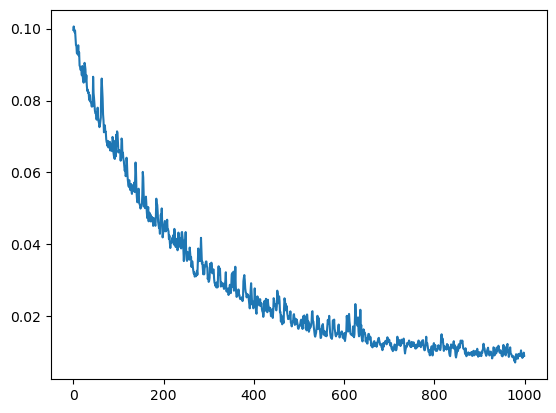

In [59]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()